In [30]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta



In [31]:
df = pd.read_csv("D:\cyrpto eda\crypto-markets.csv.zip")
display(df)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [32]:
df['date']=pd.to_datetime(df['date']).dt.date

# Finding the top 5 crytpocurrencies by market cap

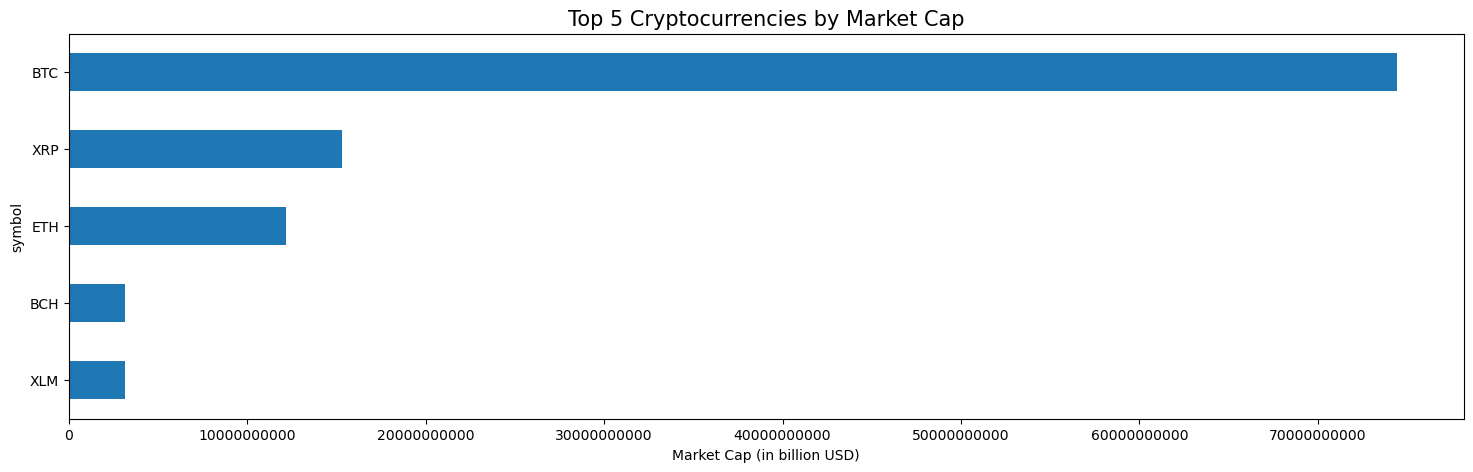

In [33]:
plt.figure(figsize=(18,5))
ax = df.groupby(['symbol'])['market'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Market Cap (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

# Observation:

From 2013 to 2018, Here we can see that Bitcoin is the highest value according to market cap and  XRP is 20% of it and Etherum is almost 15% of it and all other are very less in comparison to it and Bitcoin cash is 3 times less then Etherum.

# Plotting Graphs of Closing Prices of Top 4 Cryptocurrencies as per Market Cap

In [34]:
dx=df.copy()

top_4_currency_names = dx.groupby(['symbol'])['market'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first=dx[dx['symbol']!='BTC'].groupby(['symbol'])['market'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two=dx[(dx['symbol']!='BTC') & (dx['symbol']!='XRP')].groupby(['symbol'])['market'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two_three=dx[(dx['symbol']!='BTC') & (dx['symbol']!='XRP')& (dx['symbol']!='ETH')].groupby(['symbol'])['market'].last().sort_values(ascending=False).head(4).index

data_top_4_currencies = dx[dx['symbol'].isin(top_4_currency_names)]
top_4_currencies_after_BTC = dx[dx['symbol'].isin(top_4_currency_names_except_first)]
top_4_currencies_after_BTC_XRP = dx[dx['symbol'].isin(top_4_currency_names_except_first_two)]
top_4_currencies_after_BTC_XRP_ETH = dx[dx['symbol'].isin(top_4_currency_names_except_first_two_three)]


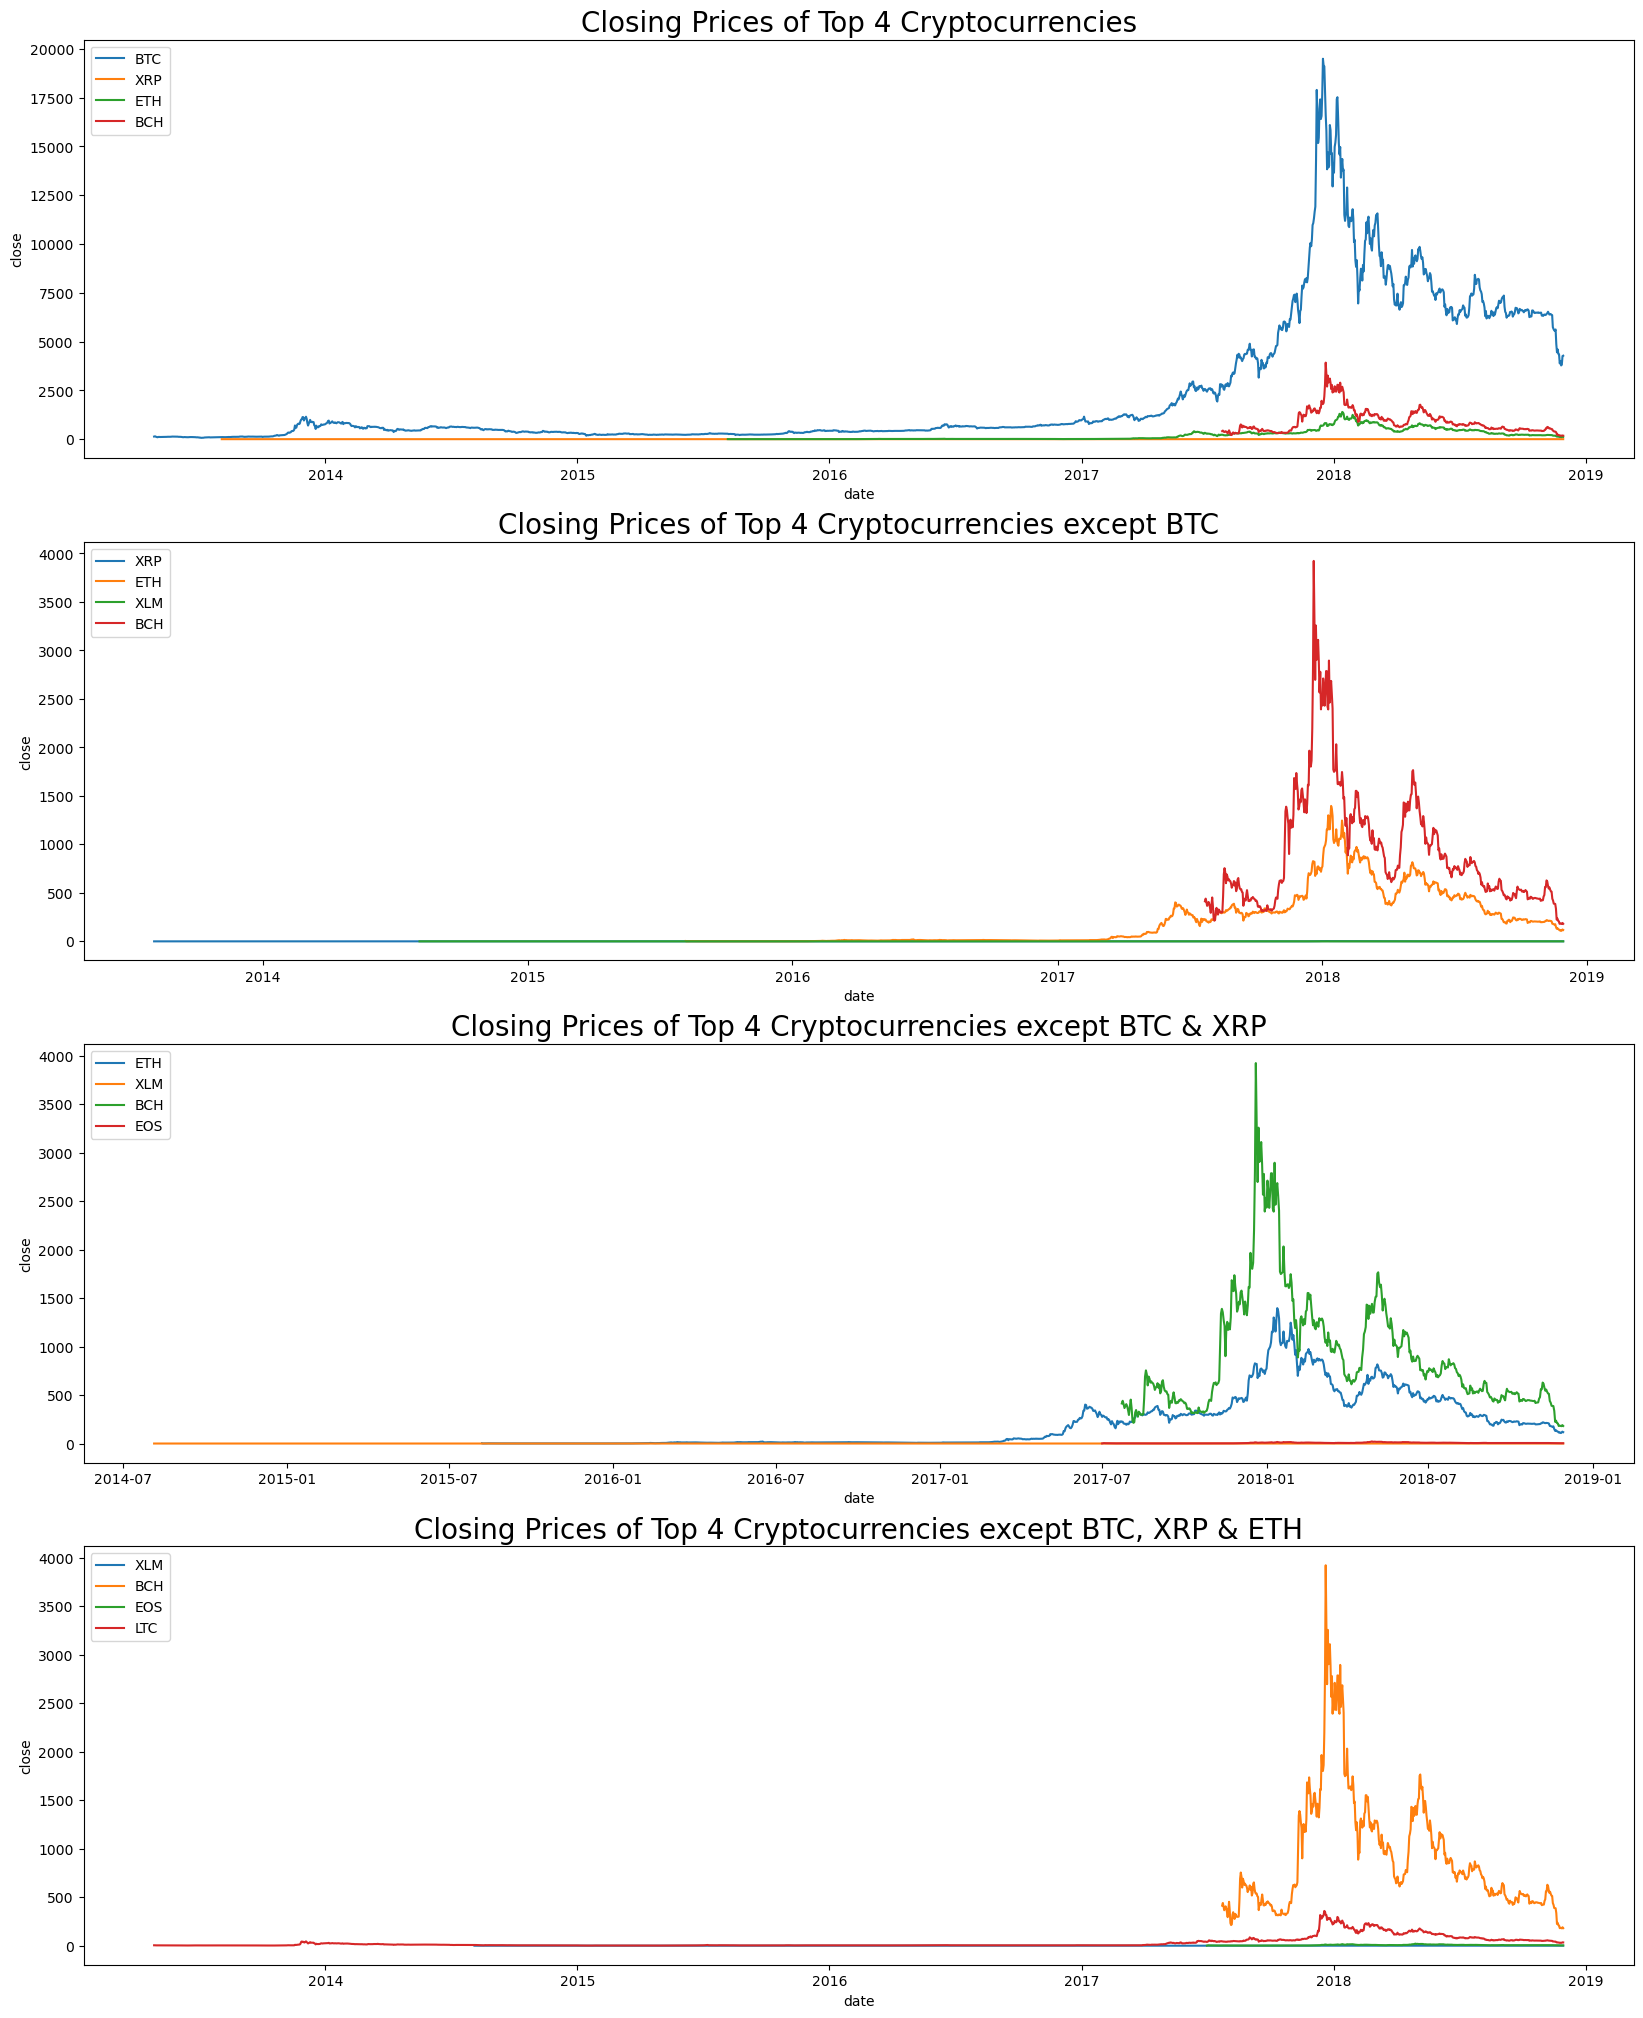

In [35]:
plt.figure(figsize=(20,25))

plt.subplot(4,1,1)
sns.lineplot(data = data_top_4_currencies , x= "date", y="close", hue='symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,2)
sns.lineplot(data=top_4_currencies_after_BTC, x="date", y="close", hue='symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,3)
sns.lineplot(data=top_4_currencies_after_BTC_XRP,x="date", y="close", hue='symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC & XRP", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,4)
sns.lineplot(data=top_4_currencies_after_BTC_XRP_ETH,x="date", y="close", hue='symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC, XRP & ETH", fontsize=20)
plt.legend(loc='upper left')

plt.show()

# Observation:

In 2018 the value of BTC was at all-time high of nearly 20,000$ which is almost 5 times more than the second-highest cryptocurrency XRP .

Among the top cryptocurrencies, the growth of BTC, XRP, and ETH over the last five years was beneficial for the investors.

In [36]:
import plotly.express as px

# Area Plot for TOP Cryptocurrencies

In [ ]:
area = px.area(data_frame= df , x = "date" ,y= "high", line_group="name" , color = "name" , color_discrete_sequence=px.colors.qualitative.Alphabet_r,title = 'Area Plot for TOP Cryptocurrencies')
area.update_xaxes(
    title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
area.update_layout(showlegend = True,title = {'text': 'Area Plot for TOP Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center',
                                              'yanchor': 'top'})

area.show()


# Market Cap Change of all Cryptocurrencies

In [ ]:
area = px.area(data_frame = df,y  = "market" , x = "date" , line_group="name", color = "name",color_discrete_sequence=px.colors.qualitative.Alphabet, title = 'Market Cap Change of all Cryptocurrencies')
area.update_xaxes(title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Percentage Change ', ticksuffix = '%')
area.update_layout(showlegend = True,title = {'text': 'MarKet Cap Change of all Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

area.show()